In [1]:
import os
import sys
from pathlib import Path
DIR_PROYECTO = Path(os.getcwd()).parent.resolve()
sys.path.append( str(DIR_PROYECTO) )

import lib
import numpy  as np
import matplotlib.pyplot as plt

from lib.energia import curva_de_potencia

### Precargamos los objetos de los meses

In [2]:
obj_meses = {}
for mes in lib.MESES:
    obj_meses[mes] = lib.ObjMes(mes)

### Experimento 1: Valores fit
Obtenemos los valores de las weibulls fiteadas para los meses típicos y los meses representativos.

In [3]:
def experimento1(hasta_año):
    for mes in lib.MESES:
        obj:lib.ObjMes = obj_meses[mes]

        # Obtenemos valores de meses representativos
        k_r, l_r = obj.parametros_weibull_representativos(hasta_año)

        # Obtenemos los valores de los meses típicos
        año_tipico = obj.encontrar_mes_tipico(hasta_año)
        k_t, l_t   = obj.parametros_weibull_tipicos(año_tipico)
        
        print("{:10s} -> Rep.: k={:4.2f} l={:4.2f} | Tip.: k={:4.2f} l={:4.2f} año={:3.0f}".format(mes,k_r, l_r,k_t,l_t,año_tipico))
    print("")


print("ROUND 1: 2001 -> 2019")
experimento1(2019)

print("ROUND 2: 2001 -> 2020")
experimento1(2020)

print("ROUND 3: 2001 -> 2021")
experimento1(2021)

ROUND 1: 2001 -> 2019
January    -> Rep.: k=2.46 l=7.69 | Tip.: k=2.55 l=7.68 año=2016
February   -> Rep.: k=2.50 l=8.00 | Tip.: k=2.42 l=7.76 año=2001
March      -> Rep.: k=2.51 l=8.24 | Tip.: k=2.51 l=8.12 año=2003
April      -> Rep.: k=2.78 l=8.76 | Tip.: k=2.90 l=8.77 año=2005
May        -> Rep.: k=2.79 l=8.01 | Tip.: k=2.70 l=7.75 año=2001
June       -> Rep.: k=2.86 l=7.59 | Tip.: k=2.85 l=7.75 año=2010
July       -> Rep.: k=3.22 l=6.78 | Tip.: k=3.38 l=6.78 año=2017
August     -> Rep.: k=3.00 l=6.41 | Tip.: k=2.93 l=6.53 año=2019
September  -> Rep.: k=2.75 l=6.69 | Tip.: k=2.74 l=6.74 año=2010
October    -> Rep.: k=2.78 l=7.22 | Tip.: k=2.86 l=7.27 año=2010
November   -> Rep.: k=2.59 l=7.47 | Tip.: k=2.56 l=7.47 año=2001
December   -> Rep.: k=2.48 l=7.64 | Tip.: k=2.58 l=7.50 año=2004

ROUND 2: 2001 -> 2020
January    -> Rep.: k=2.48 l=7.70 | Tip.: k=2.55 l=7.68 año=2016
February   -> Rep.: k=2.51 l=7.99 | Tip.: k=2.42 l=7.76 año=2001
March      -> Rep.: k=2.53 l=8.25 | Tip.: k=2

### Experimento 2: Cálculo energía meses

In [4]:
def experimento2(hasta_año):

    prom_mape = []

    for mes in lib.MESES:
        obj:lib.ObjMes = obj_meses[mes]

        # Encontramos datos del mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año)
        ws_tipico  = lib.cargar_datos(año=año_tipico, mes=mes)

        # Encontramos datos representativos del siguiente año
        año = hasta_año + 1
        ws_real = lib.cargar_datos(año=año, mes=mes)

        # Calculamos energías
        energia_pred = lib.calcular_energia(ws_tipico)
        energia_real = lib.calcular_energia(ws_real)

        # Obtenemos mapes entre ellas
        mape = 100*np.abs(energia_real-energia_pred) / energia_real

        print("{:10s} -> E. Esperada: {:6.1f} | E. Obtenida | {:6.1f} | MAPE: {:5.2f}%".format(mes,energia_pred,energia_real, mape))

        prom_mape.append(mape)
    print("Promedio MAPE -> MAPE: {:5.2f}%".format(np.mean(prom_mape)))
    print("")

    

print("ROUND 1: 2001 -> 2019 | Evaluación 2020")
experimento2(2019)

print("ROUND 2: 2001 -> 2020 | Evaluación 2021")
experimento2(2020)

print("ROUND 3: 2001 -> 2021 | Evaluación 2022")
experimento2(2021)


ROUND 1: 2001 -> 2019 | Evaluación 2020
January    -> E. Esperada:  828.8 | E. Obtenida |  879.8 | MAPE:  5.81%
February   -> E. Esperada:  767.6 | E. Obtenida |  776.6 | MAPE:  1.16%
March      -> E. Esperada:  931.2 | E. Obtenida |  978.3 | MAPE:  4.82%
April      -> E. Esperada: 1054.0 | E. Obtenida |  870.2 | MAPE: 21.12%
May        -> E. Esperada:  842.8 | E. Obtenida |  844.5 | MAPE:  0.19%
June       -> E. Esperada:  814.0 | E. Obtenida |  990.8 | MAPE: 17.85%
July       -> E. Esperada:  580.5 | E. Obtenida |  642.7 | MAPE:  9.68%
August     -> E. Esperada:  536.9 | E. Obtenida |  609.3 | MAPE: 11.88%
September  -> E. Esperada:  578.5 | E. Obtenida |  516.4 | MAPE: 12.03%
October    -> E. Esperada:  720.4 | E. Obtenida |  866.7 | MAPE: 16.89%
November   -> E. Esperada:  753.7 | E. Obtenida |  810.6 | MAPE:  7.03%
December   -> E. Esperada:  785.5 | E. Obtenida |  833.9 | MAPE:  5.81%
Promedio MAPE -> MAPE:  9.52%

ROUND 2: 2001 -> 2020 | Evaluación 2021
January    -> E. Esperada

In [5]:
def experimento2_5años_eval():

    prom_mape = []

    for mes in lib.MESES:
        obj:lib.ObjMes = obj_meses[mes]

        # Encontramos datos del mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año=2017)

        ws_tipico    = lib.cargar_datos(año=año_tipico, mes=mes)
        energia_pred = lib.calcular_energia(ws_tipico)

        # Encontramos datos representativos del los siguientes años
        # y calculamos sus energías
        energia_real = []
        for año in range(2018,2023):
            ws_real = lib.cargar_datos(año=año, mes=mes)
            energia_real.append( lib.calcular_energia(ws_real) )
        energia_real = np.array(energia_real)
        
        # Obtenemos mapes entre ellas
        mape = np.mean( 100*np.abs(energia_real-energia_pred) / energia_real )

        print("{:10s} -> MAPE: {:5.2f}%".format(mes, mape))

        prom_mape.append(mape)
    print("Promedio MAPE -> MAPE: {:5.2f}%".format(np.mean(prom_mape)))
    print("")

print("Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)")
experimento2_5años_eval()

Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)
January    -> MAPE:  5.56%
February   -> MAPE:  8.61%
March      -> MAPE:  7.95%
April      -> MAPE: 12.74%
May        -> MAPE: 10.06%
June       -> MAPE: 16.95%
July       -> MAPE: 18.94%
August     -> MAPE: 15.77%
September  -> MAPE: 11.33%
October    -> MAPE: 13.91%
November   -> MAPE:  8.29%
December   -> MAPE:  8.23%
Promedio MAPE -> MAPE: 11.53%



### Experimento 3: Calculo energía temporadas

In [6]:
# Nota: Corregir linea 13 Hay que obtener los datos de los meses tipipcos ya calculados
# aquí todos los datos vienen de un solo año por  lo que está mal.
# ver lineas 14 y 15
# igual debe de corregirse para la evaluación a 5 años

def experimento3(hasta_año):

    prom_mape = []

    temporada = {
        "Hot":["January","February", "March","April","May","June","October","November","December"],
        "Mild": ["July", "August","September"],
    }

    for temp in temporada:
        obj:lib.ObjMes = obj_meses[mes]

        # Encontramos datos del mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año)
        ws_tipico  = lib.cargar_datos(año=año_tipico, mes=temporada[temp])

        # Encontramos datos representativos del siguiente año
        año = hasta_año + 1
        ws_real = lib.cargar_datos(año=año, mes=temporada[temp])

        # Calculamos energías
        energia_pred = lib.calcular_energia(ws_tipico)
        energia_real = lib.calcular_energia(ws_real)

        # Obtenemos mapes entre ellas
        mape = 100*np.abs(energia_real-energia_pred) / energia_real

        print("{:10s} -> E. Esperada: {:6.1f} | E. Obtenida | {:6.1f} | MAPE: {:5.2f}%".format(temp,energia_pred,energia_real, mape))

        prom_mape.append(mape)
    print("Promedio MAPE -> MAPE: {:5.2f}%".format(np.mean(prom_mape)))
    print("")

print("ROUND 1: 2001 -> 2014 | Evaluación 2015")
experimento3(2014)

print("ROUND 2: 2001 -> 2015 | Evaluación 2016")
experimento3(2015)  

print("ROUND 3: 2001 -> 2016 | Evaluación 2017")
experimento3(2016)    

print("ROUND 4: 2001 -> 2017 | Evaluación 2018")
experimento3(2017)

print("ROUND 5: 2001 -> 2018 | Evaluación 2019")
experimento3(2018)

print("ROUND 6: 2001 -> 2019 | Evaluación 2020")
experimento3(2019)

print("ROUND 7: 2001 -> 2020 | Evaluación 2021")
experimento3(2020)

print("ROUND 8: 2001 -> 2021 | Evaluación 2022")
experimento3(2021)

ROUND 1: 2001 -> 2014 | Evaluación 2015
Hot        -> E. Esperada: 7112.7 | E. Obtenida | 6899.4 | MAPE:  3.09%
Mild       -> E. Esperada: 1654.6 | E. Obtenida | 1620.6 | MAPE:  2.10%
Promedio MAPE -> MAPE:  2.59%

ROUND 2: 2001 -> 2015 | Evaluación 2016
Hot        -> E. Esperada: 7112.7 | E. Obtenida | 7294.6 | MAPE:  2.49%
Mild       -> E. Esperada: 1654.6 | E. Obtenida | 1751.9 | MAPE:  5.55%
Promedio MAPE -> MAPE:  4.02%

ROUND 3: 2001 -> 2016 | Evaluación 2017
Hot        -> E. Esperada: 7112.7 | E. Obtenida | 8113.9 | MAPE: 12.34%
Mild       -> E. Esperada: 1654.6 | E. Obtenida | 1600.3 | MAPE:  3.39%
Promedio MAPE -> MAPE:  7.87%

ROUND 4: 2001 -> 2017 | Evaluación 2018
Hot        -> E. Esperada: 7112.7 | E. Obtenida | 7512.1 | MAPE:  5.32%
Mild       -> E. Esperada: 1654.6 | E. Obtenida | 1592.2 | MAPE:  3.92%
Promedio MAPE -> MAPE:  4.62%

ROUND 5: 2001 -> 2018 | Evaluación 2019
Hot        -> E. Esperada: 7294.6 | E. Obtenida | 7950.6 | MAPE:  8.25%
Mild       -> E. Esperada: 1

In [7]:
def experimento3_5años_eval():

    prom_mape = []

    temporada = {
        "Hot":["January","February", "March","April","May","June","October","November","December"],
        "Mild": ["July", "August","September"],
    }

    for temp in temporada:
        obj:lib.ObjMes = obj_meses[mes]

        # Encontramos datos del mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año=2017)
        ws_tipico  = lib.cargar_datos(año=año_tipico, mes=temporada[temp])
        energia_pred = lib.calcular_energia(ws_tipico)

        # Encontramos datos representativos del siguiente año
        energia_real = []
        for año in range(2018,2023):
            ws_real = lib.cargar_datos(año=año, mes=temporada[temp])
            energia_real.append( lib.calcular_energia(ws_real) )
        energia_real = np.array(energia_real)

        mape = np.mean( 100*np.abs(energia_real-energia_pred) / energia_real )
        
        print("{:10s} ->  MAPE: {:5.2f}%".format(temp, mape))

        prom_mape.append(mape)
    print("Promedio MAPE -> MAPE: {:5.2f}%".format(np.mean(prom_mape)))
    print("")

print("Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)")
experimento3_5años_eval()

Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)
Hot        ->  MAPE:  8.18%
Mild       ->  MAPE:  5.96%
Promedio MAPE -> MAPE:  7.07%



### Experimento 4: Cálculo Anual

In [8]:
def experimento4_5años_eval():

    # Calculamos la energía total mes por mes año tipico
    energia_pred = 0   # -> Energía total del año.
    for mes in lib.MESES:
        obj:lib.ObjMes = obj_meses[mes]
        # Encontramos datos del mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año=2017)
        ws_tipico  = lib.cargar_datos(año=año_tipico, mes=mes)
        energia_pred += lib.calcular_energia(ws_tipico)

    print("Energía predicha: {:5.1f} kWh".format(energia_pred))
    # Encontramos datos representativos del los siguientes años
    # y calculamos sus energías
    energia_real = []
    for año in range(2018,2023):
        ws_real = lib.cargar_datos(año=año)
        energia =  lib.calcular_energia(ws_real)
        energia_real.append( energia )
        ape = 100*np.abs(energia-energia_pred) / energia
        print("Energía año {:4.0f}: {:5.1f} kWh (dif {:3.1f}%)".format(año, energia, ape))

    energia_real = np.array(energia_real)
        
    # Obtenemos mapes entre ellas
    mape = np.mean( 100*np.abs(energia_real-energia_pred) / energia_real )

    print("MAPE: {:5.2f}%".format(mape))

    print("")

print("Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)")
experimento4_5años_eval()

Entrenamiento: 2001 -> 2017 | Evaluación 2018 -> 2022 (5 años)


Energía predicha: 9115.7 kWh
Energía año 2018: 9171.7 kWh (dif 0.6%)
Energía año 2019: 9794.2 kWh (dif 6.9%)
Energía año 2020: 9616.5 kWh (dif 5.2%)
Energía año 2021: 9203.6 kWh (dif 1.0%)
Energía año 2022: 9562.9 kWh (dif 4.7%)
MAPE:  3.68%



In [4]:
def experimento_5():

    def MAPE(y_true, y_pred):
        return 100*np.abs(y_true-y_pred) / y_true
    
    def energia_con_prom_suma(ws):
        
        ws = np.copy(ws)
        
        # Corrección exclusión valores menores a 3.5
        idx = ws > 3.5 
        ws  = ws[idx]

        n = len(ws)
        
        ws_prom  = np.mean(ws)
        ws_prom_r  = np.repeat( np.mean(ws_prom), n)
        potencia = curva_de_potencia(ws_prom_r)
        energia  = np.sum(potencia)
        return energia / 1_000, ws_prom
    
    def energia_datos(ws):
        ws = np.copy(ws)
        potencia = curva_de_potencia(ws)
        energia = np.sum(potencia)
        return energia  / 1_000
    
    temporada = {
        "Mild":["January","February", "March","April","May","June","October","November","December"],
        "Hot" : ["July", "August","September"],
    }

    # Mapes
    mape_hot_weibull, mape_mild_weibull, mape_anual_weibull = [], [], []
    mape_hot_pred, mape_mild_pred, mape_anual_pred          = [], [], []
    mape_hot_prom, mape_mild_prom, mape_anual_prom          = [], [], []

    for hasta_año in range(2014,2022):

        año_evaluacion = hasta_año +1

        print(f"Año entrenamiento 2001-{hasta_año} | Evaluación año {año_evaluacion}")
        print("----------------------------------------------------------------------")
        # Obtenemos las temporadas típicas

        ws_hot_tipico = []
        for mes in temporada["Hot"]:
            obj:lib.ObjMes = obj_meses[mes]
            año_mes_tipico = obj.encontrar_mes_tipico(hasta_año)
            ws_hot_tipico.append(lib.cargar_datos(año=año_mes_tipico, mes=mes))
        ws_hot_tipico = np.concatenate(ws_hot_tipico)

        ws_mild_tipico = []
        for mes in temporada["Mild"]:
            obj:lib.ObjMes = obj_meses[mes]
            año_mes_tipico = obj.encontrar_mes_tipico(hasta_año)
            ws_mild_tipico.append(lib.cargar_datos(año=año_mes_tipico, mes=mes))
        ws_mild_tipico = np.concatenate(ws_mild_tipico)

        # Calculamos energías de las temporadas típicas

        energia_hot_tipico  = lib.calcular_energia(ws_hot_tipico)
        energia_mild_tipico = lib.calcular_energia(ws_mild_tipico)
        ws_año_tipico       = np.concatenate([ws_hot_tipico, ws_mild_tipico])
        energia_año_tipico  = lib.calcular_energia(ws_año_tipico)
        energia_año_suma = energia_hot_tipico + energia_mild_tipico

        # Obtenemos datos del siguiente año

        ws_hot = []
        for mes in temporada["Hot"]:
            obj:lib.ObjMes = obj_meses[mes]
            año_mes_tipico = obj.encontrar_mes_tipico(hasta_año)
            ws_hot.append(lib.cargar_datos(año=año_evaluacion, mes=mes))
        ws_hot = np.concatenate(ws_hot)

        ws_mild = []
        for mes in temporada["Mild"]:
            obj:lib.ObjMes = obj_meses[mes]
            año_mes_tipico = obj.encontrar_mes_tipico(hasta_año)
            ws_mild.append(lib.cargar_datos(año=año_evaluacion, mes=mes))
        ws_mild = np.concatenate(ws_mild)

        # Obtenemos energía anual usando el promedio de las velocidades de viento
        energia_vel_prom_hot  , ws_prom_hot   = energia_con_prom_suma(ws_hot)
        energia_vel_prom_mild , ws_prom_mild  = energia_con_prom_suma(ws_mild)
        ws_anual = np.concatenate([ws_hot, ws_mild])
        ws_prom_anual = np.mean(ws_anual)
        energia_vel_prom_anual, _  = energia_con_prom_suma(ws_anual) 
        
        # Obtenemos la energía indiviual con weibulls de los datos
        energia_weibull_hot   = lib.calcular_energia(ws_hot)
        energia_weibull_mild  = lib.calcular_energia(ws_mild)
        energia_weibull_anual = lib.calcular_energia( np.concatenate([ws_hot,ws_mild]))
        

        # Calculo de energia_dato_a_dato
        energia_hot   = energia_datos(ws_hot)
        energia_mild  = energia_datos(ws_mild)
        energia_anual = energia_hot + energia_mild

        ape_hot_weibull   = MAPE(energia_hot  , energia_weibull_hot)   ; mape_hot_weibull.append(ape_hot_weibull)
        ape_mild_weibull  = MAPE(energia_mild , energia_weibull_mild ) ; mape_mild_weibull.append(ape_mild_weibull)
        ape_anual_weibull = MAPE(energia_anual, energia_weibull_anual) ; mape_anual_weibull.append(ape_anual_weibull)
        

        ape_hot_pred   = MAPE(energia_hot, energia_hot_tipico)   ; mape_hot_pred.append(ape_hot_pred)
        ape_mild_pred  = MAPE(energia_mild, energia_mild_tipico) ; mape_mild_pred.append(ape_mild_pred)
        ape_anual_pred = MAPE(energia_anual, energia_año_tipico)  ; mape_anual_pred.append(ape_anual_pred)
        ape_anual_pred_suma = MAPE(energia_anual, energia_año_suma)


        ape_hot_prom   =  MAPE(energia_hot, energia_vel_prom_hot)      ; mape_hot_prom.append(ape_hot_prom)
        ape_mild_prom  =  MAPE(energia_mild, energia_vel_prom_mild)    ; mape_mild_prom.append(ape_mild_prom)
        ape_anual_prom =  MAPE(energia_anual, energia_vel_prom_anual)  ; mape_anual_prom.append(ape_anual_prom)

        #print("DEBUG", energia_vel_prom_anual, ape_anual_prom, ws_prom_anual)

        print("Energia temp hot  (año evaluación) [Referencia] : {:5.1f} MWh".format(energia_hot ))
        print("Energia temp mild (año evaluación) [Referencia] : {:5.1f} MWh".format(energia_mild))
        print("Energía anual     (año evaluación) [Referencia] : {:5.1f} MWh".format(energia_anual))
        print("")

        print("Energia temp hot  weibull (año evaluación)  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_weibull_hot  , ape_hot_weibull))
        print("Energia temp mild weibull (año evaluación)  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_weibull_mild , ape_mild_weibull))
        print("Energía anual     weibull (año evaluación)  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_weibull_anual, ape_anual_weibull))
        print("")



        print("Energía temp hot  (con año típico)  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_hot_tipico , ape_hot_pred ))
        print("Energía temp mild (con año tipico)  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_mild_tipico, ape_mild_pred))
        print("Energía año típico                  : {:5.1f} MWh | MAPE: {:4.2f}%".format(energia_año_tipico , ape_anual_pred))
        print("Energía año típico (suma)           : {:5.1f} MWh | MAPE  {:4.2f}%".format(energia_año_suma, ape_anual_pred_suma)) 
        print("")

        print("Energía  hot  con prom de velocidad  (año evaluación): {:5.1f} MWh | MAPE: {:4.2f}% | Vel prom {:10.6f}".format(energia_vel_prom_hot  , ape_hot_prom, ws_prom_hot))
        print("Energía  mild con prom de velocidad  (año evaluación): {:5.1f} MWh | MAPE: {:4.2f}% | Vel prom {:10.6f}".format(energia_vel_prom_mild , ape_mild_prom, ws_prom_mild))
        print("Energía  anual con prom de velocidad (año evaluación): {:5.1f} MWh | MAPE: {:4.2f}% | Vel prom {:10.6f}".format(energia_vel_prom_anual, ape_anual_prom, ws_prom_anual))
        print("")

        print("Parámetros Weibull (Año típico):")
        for mes in lib.MESES:
            obj = obj_meses[mes]
            año_tipico = obj.encontrar_mes_tipico(hasta_año=hasta_año)
            k, l = obj.parametros_weibull_tipicos(año_tipico)
            print("{:10s} ({:4.0f}): k={:5.3f} | lambda={:5.3f}".format(mes,año_tipico,k, l))
        print("\n")
        

    print("-------------------------------------------------------------------------------")
    print("PROMEDIOS MAPES")
    print("MAPE temp hot   weibull: {:4.2f}%".format(np.mean(mape_hot_weibull)))
    print("MAPE temp mild  weibull: {:4.2f}%".format(np.mean(mape_mild_weibull)))
    print("MAPE      anual weibull: {:4.2f}%\n".format(np.mean(mape_anual_weibull)))

    print("MAPE temp hot   tipico  (pred): {:4.2f}%".format(np.mean(mape_hot_pred)))
    print("MAPE temp mild  tipico  (pred): {:4.2f}%".format(np.mean(mape_mild_pred)))
    print("MAPE      anual tipico  (pred): {:4.2f}%\n".format(np.mean(mape_anual_pred)))

    print("MAPE temp hot   promedio: {:4.2f}%".format(np.mean(mape_hot_prom)))
    print("MAPE temp mild  promedio: {:4.2f}%".format(np.mean(mape_mild_prom)))
    print("MAPE temp anual promedio: {:4.2f}%".format(np.mean(mape_anual_prom)))
    
    print("\n")




        
        

experimento_5()

Año entrenamiento 2001-2014 | Evaluación año 2015
----------------------------------------------------------------------
Energia temp hot  (año evaluación) [Referencia] : 1659.1 MWh
Energia temp mild (año evaluación) [Referencia] : 6929.6 MWh
Energía anual     (año evaluación) [Referencia] : 8588.8 MWh

Energia temp hot  weibull (año evaluación)  : 1620.6 MWh | MAPE: 2.32%
Energia temp mild weibull (año evaluación)  : 6899.4 MWh | MAPE: 0.44%
Energía anual     weibull (año evaluación)  : 8560.5 MWh | MAPE: 0.33%

Energía temp hot  (con año típico)  : 1621.9 MWh | MAPE: 2.24%
Energía temp mild (con año tipico)  : 7502.9 MWh | MAPE: 8.27%
Energía año típico                  : 9193.9 MWh | MAPE: 7.05%


NameError: name 'energia_weibull_anual_suma' is not defined

### Contructor de gráficas mensuales

In [10]:
def constuir_graficas_meses(hasta_año):

    num_y , num_x = 3 , 4
    fig , ax = plt.subplots(num_y,num_x,figsize=(num_x*5.5,num_y*6))

    z = 0
    for mes in lib.MESES:
        j = z % 4
        i = z // 4
        obj:lib.ObjMes = obj_meses[mes]
        x = np.linspace(0,20,1000)
        for año in range(2001,hasta_año+1):
            k, l = obj.parametros_weibull_tipicos(año)
            y = lib.generar_curva(x, (1,k,0,l))
            ax[i,j].plot(x,y, alpha=0.2)

        # Mes tipico
        año_tipico = obj.encontrar_mes_tipico(hasta_año)
        k, l = obj.parametros_weibull_tipicos(año_tipico)
        y = lib.generar_curva(x, (1,k,0,l))
        ax[i,j].plot(x,y, c="red", lw=2, label=f"Typical {mes} ({año_tipico})")

        # Mes representativo
        k, l = obj.parametros_weibull_representativos(hasta_año)
        y = lib.generar_curva(x, (1,k,0,l))
        ax[i,j].plot(x,y, c="cyan", lw=2, label=f"Characteristic {mes}")
        ax[i,j].set_ylim(0,0.25)
        ax[i,j].set_ylabel("PDF")
        ax[i,j].set_xlabel("Wind speed [m/s]")
        ax[i,j].legend()

        z += 1
    plt.show() ; plt.close()

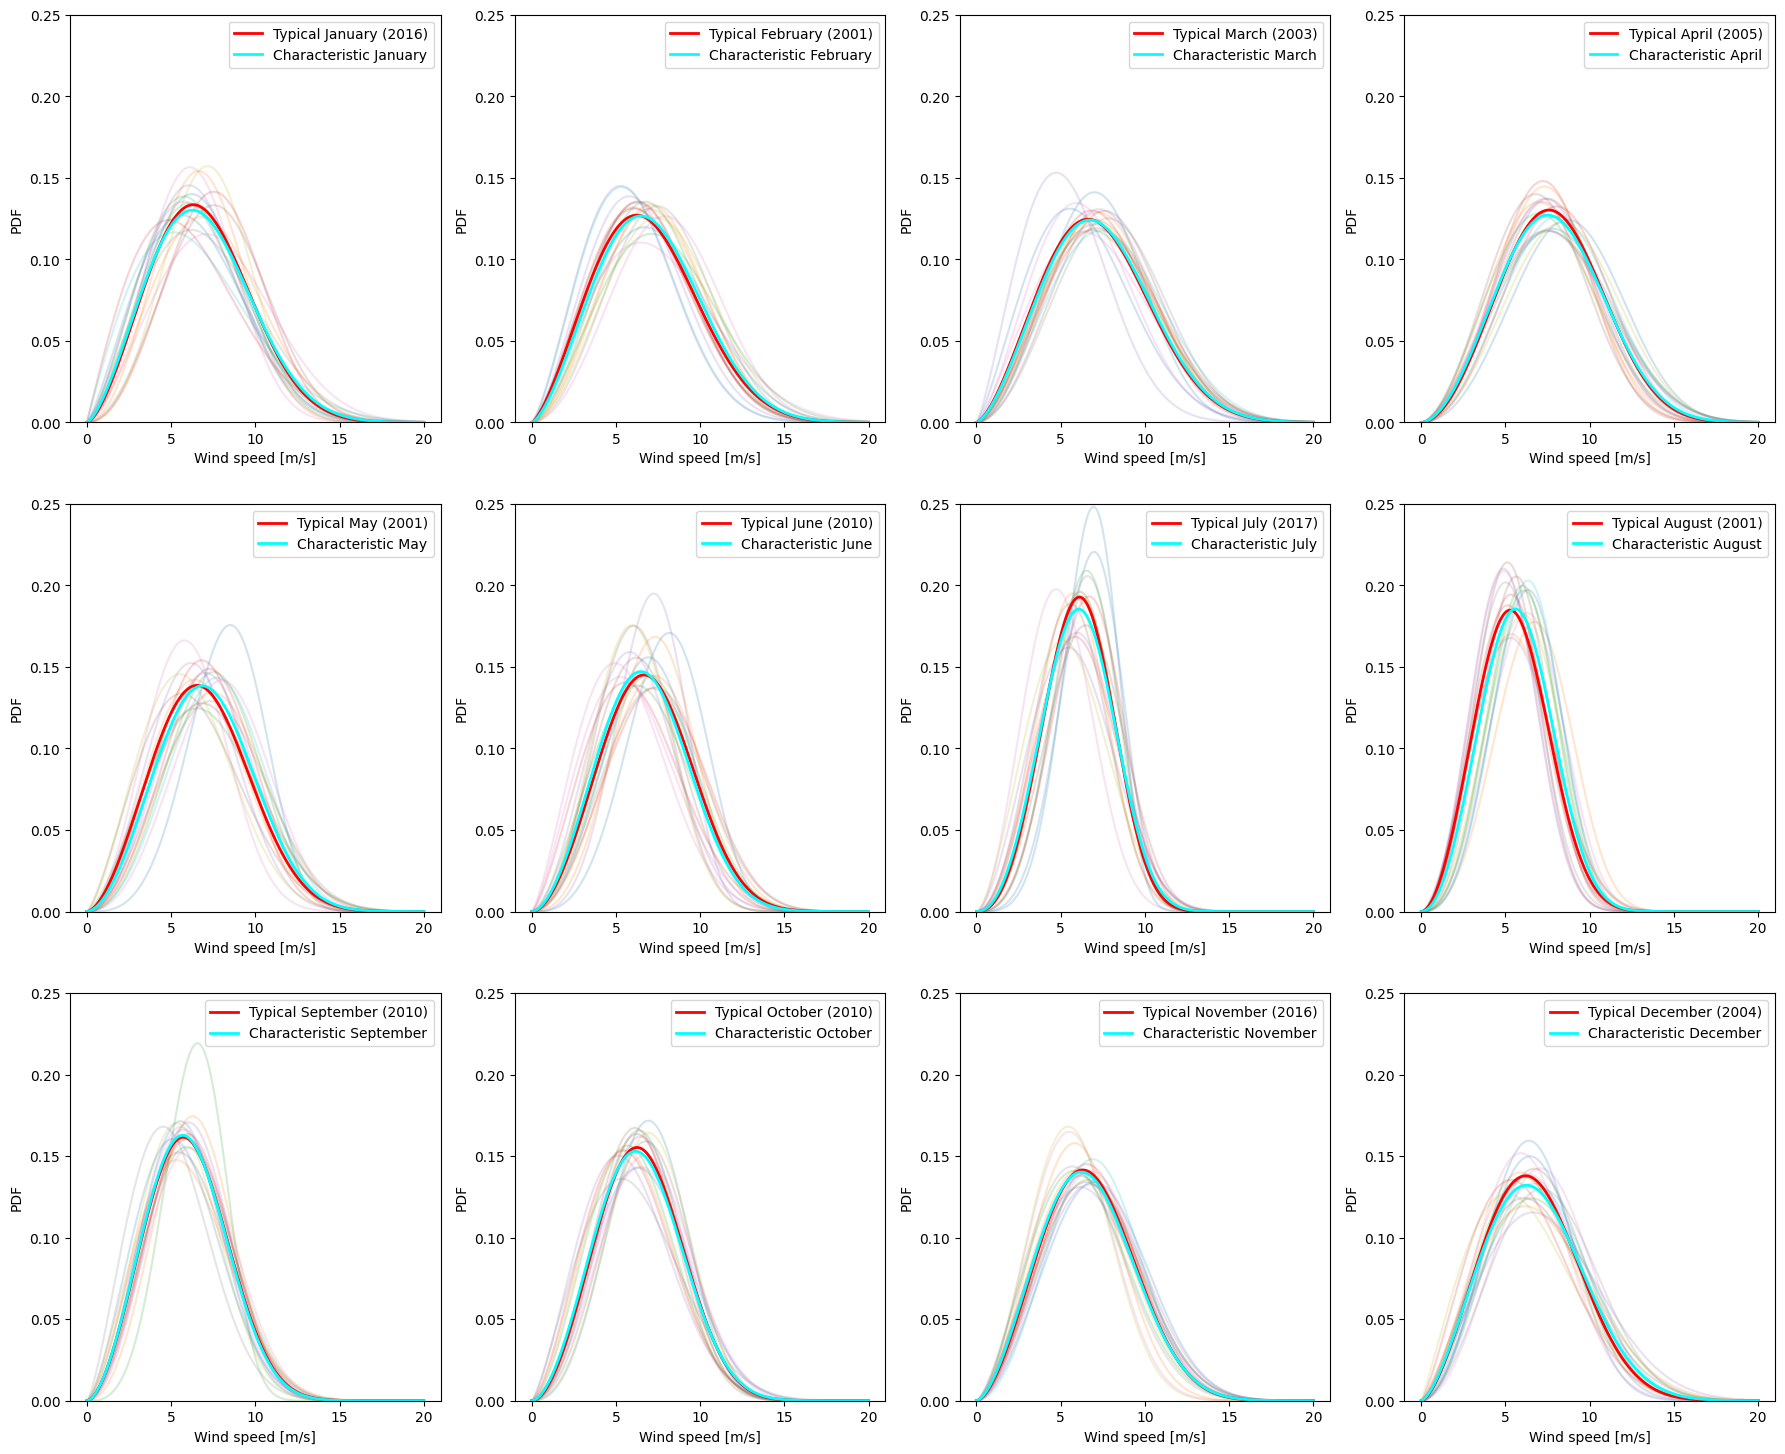

In [11]:
constuir_graficas_meses(2017)

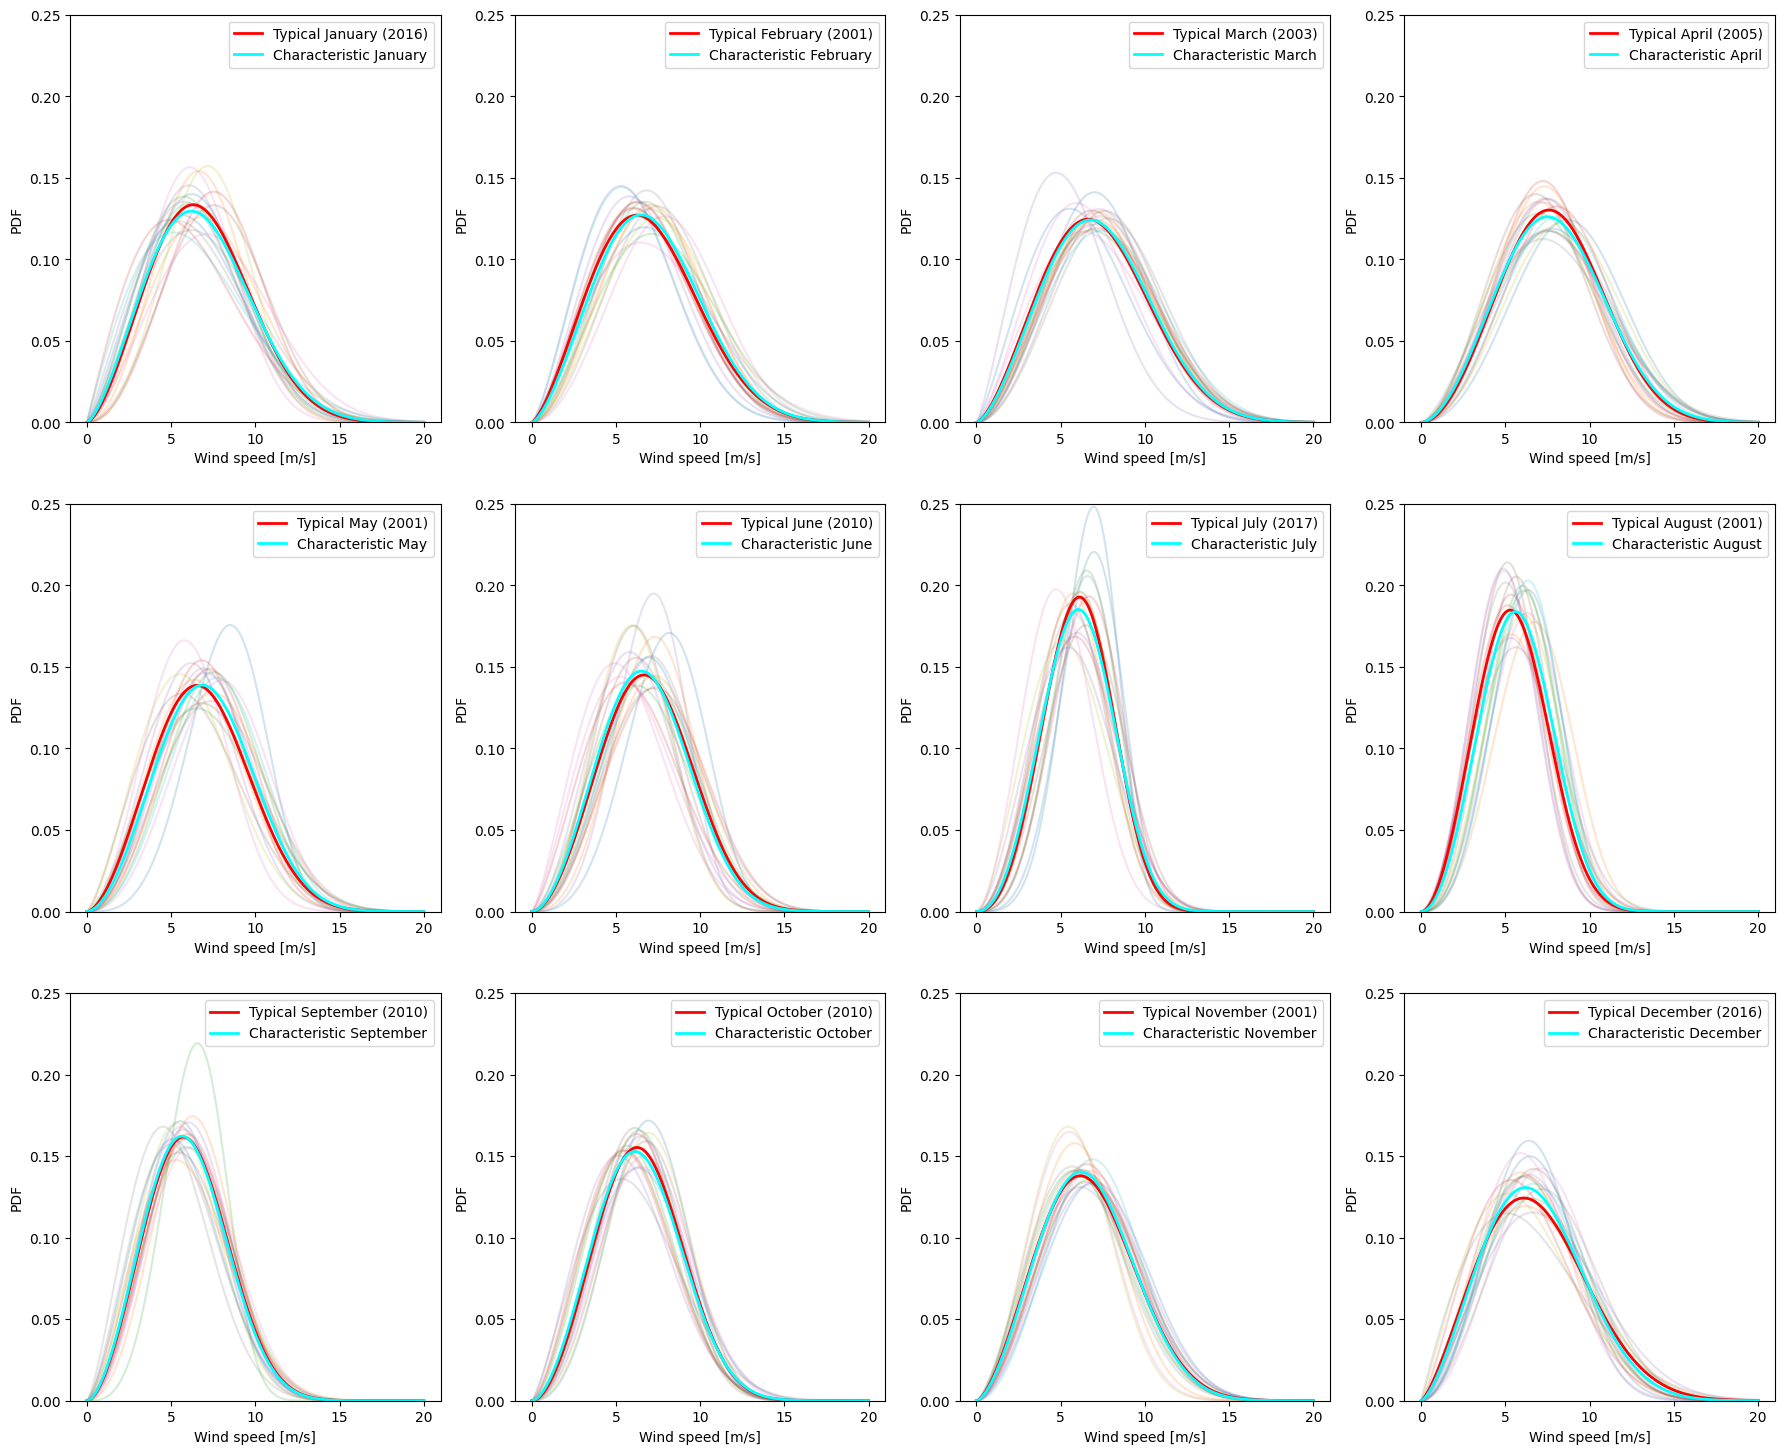

In [12]:
constuir_graficas_meses(2018)

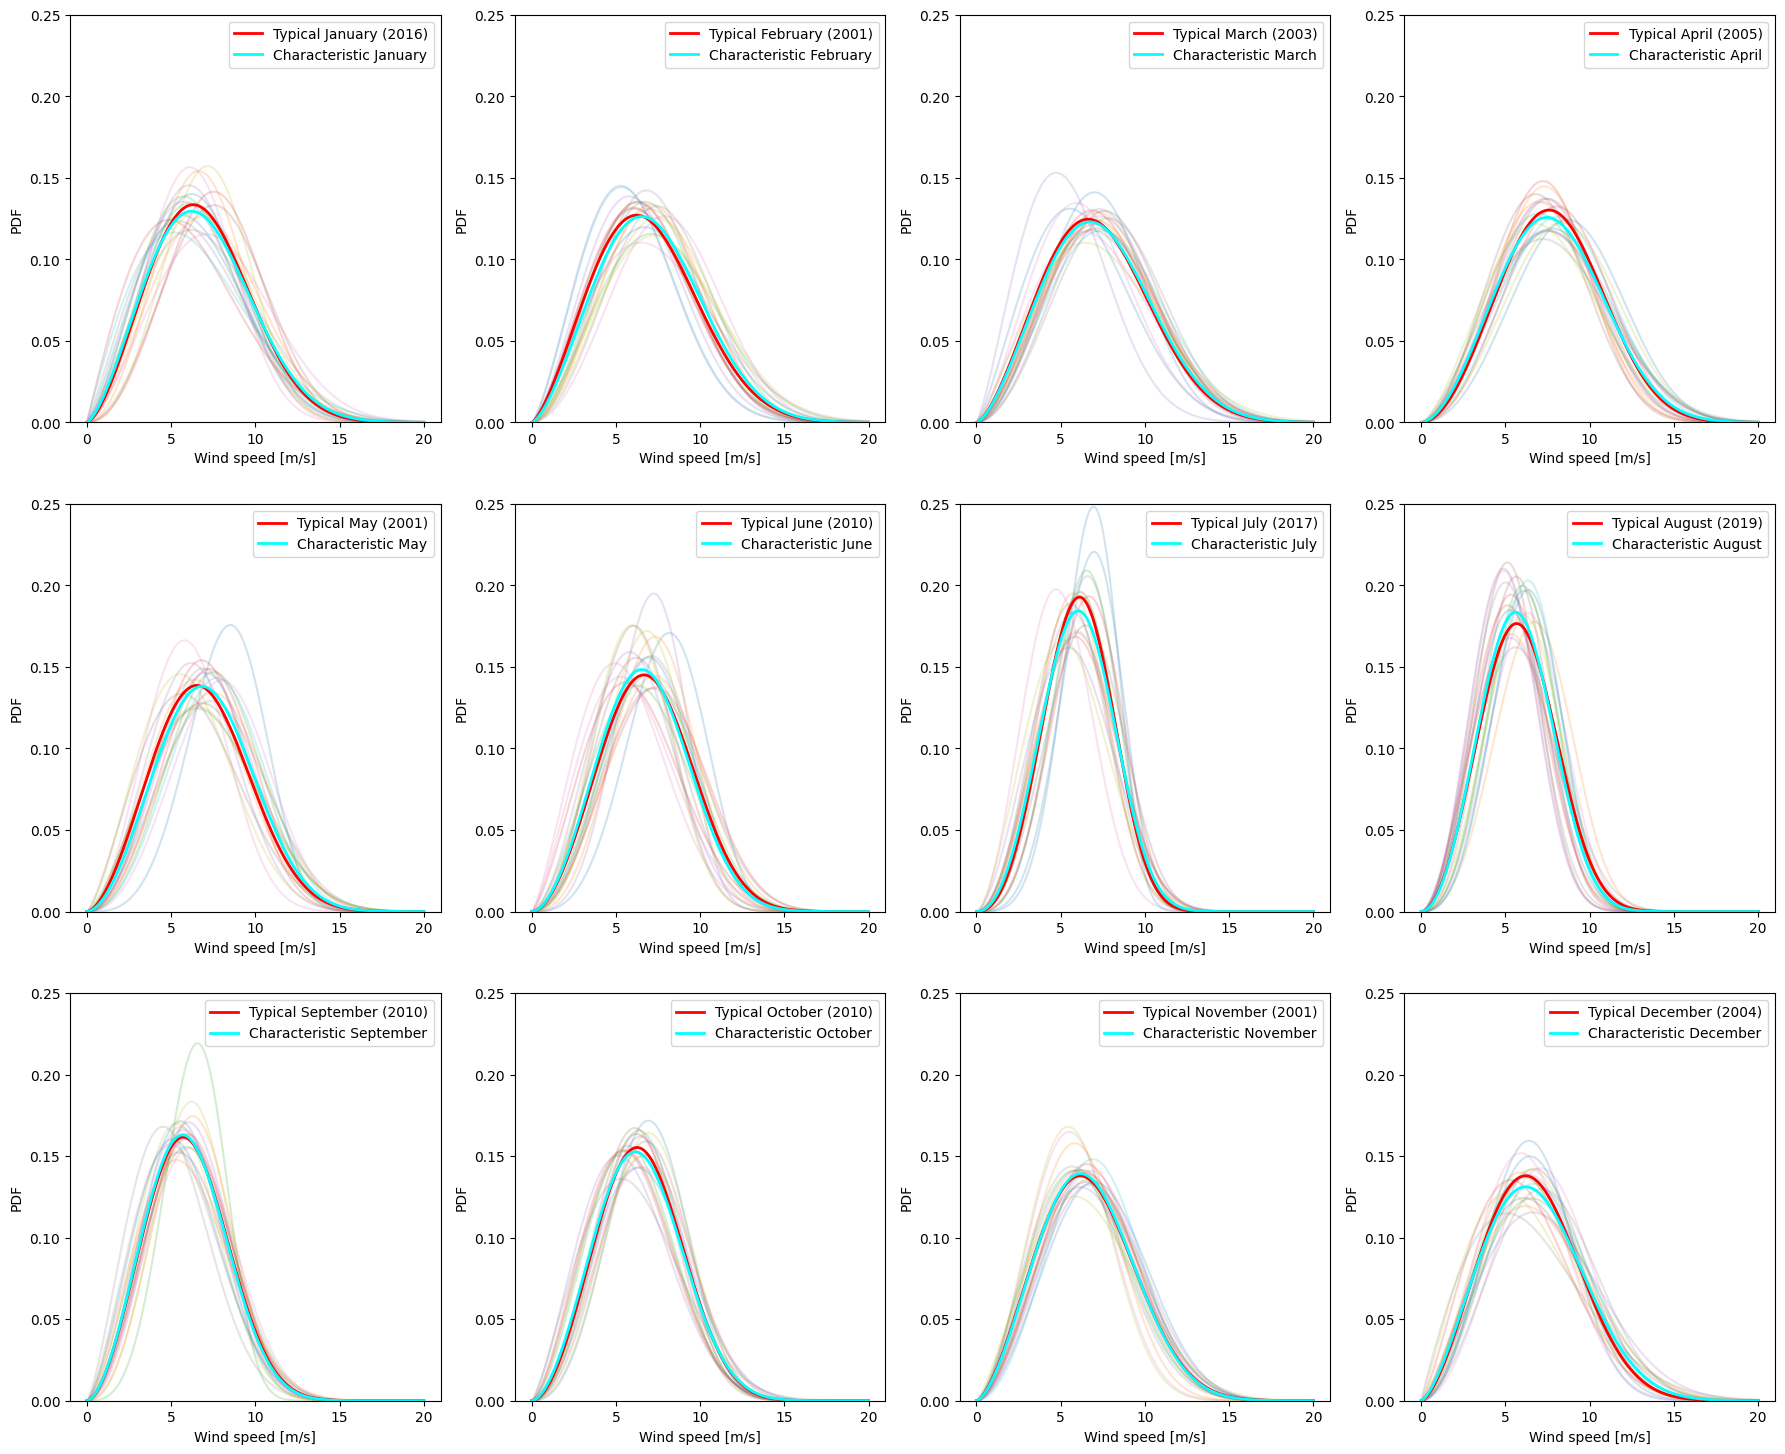

In [13]:
constuir_graficas_meses(2019)

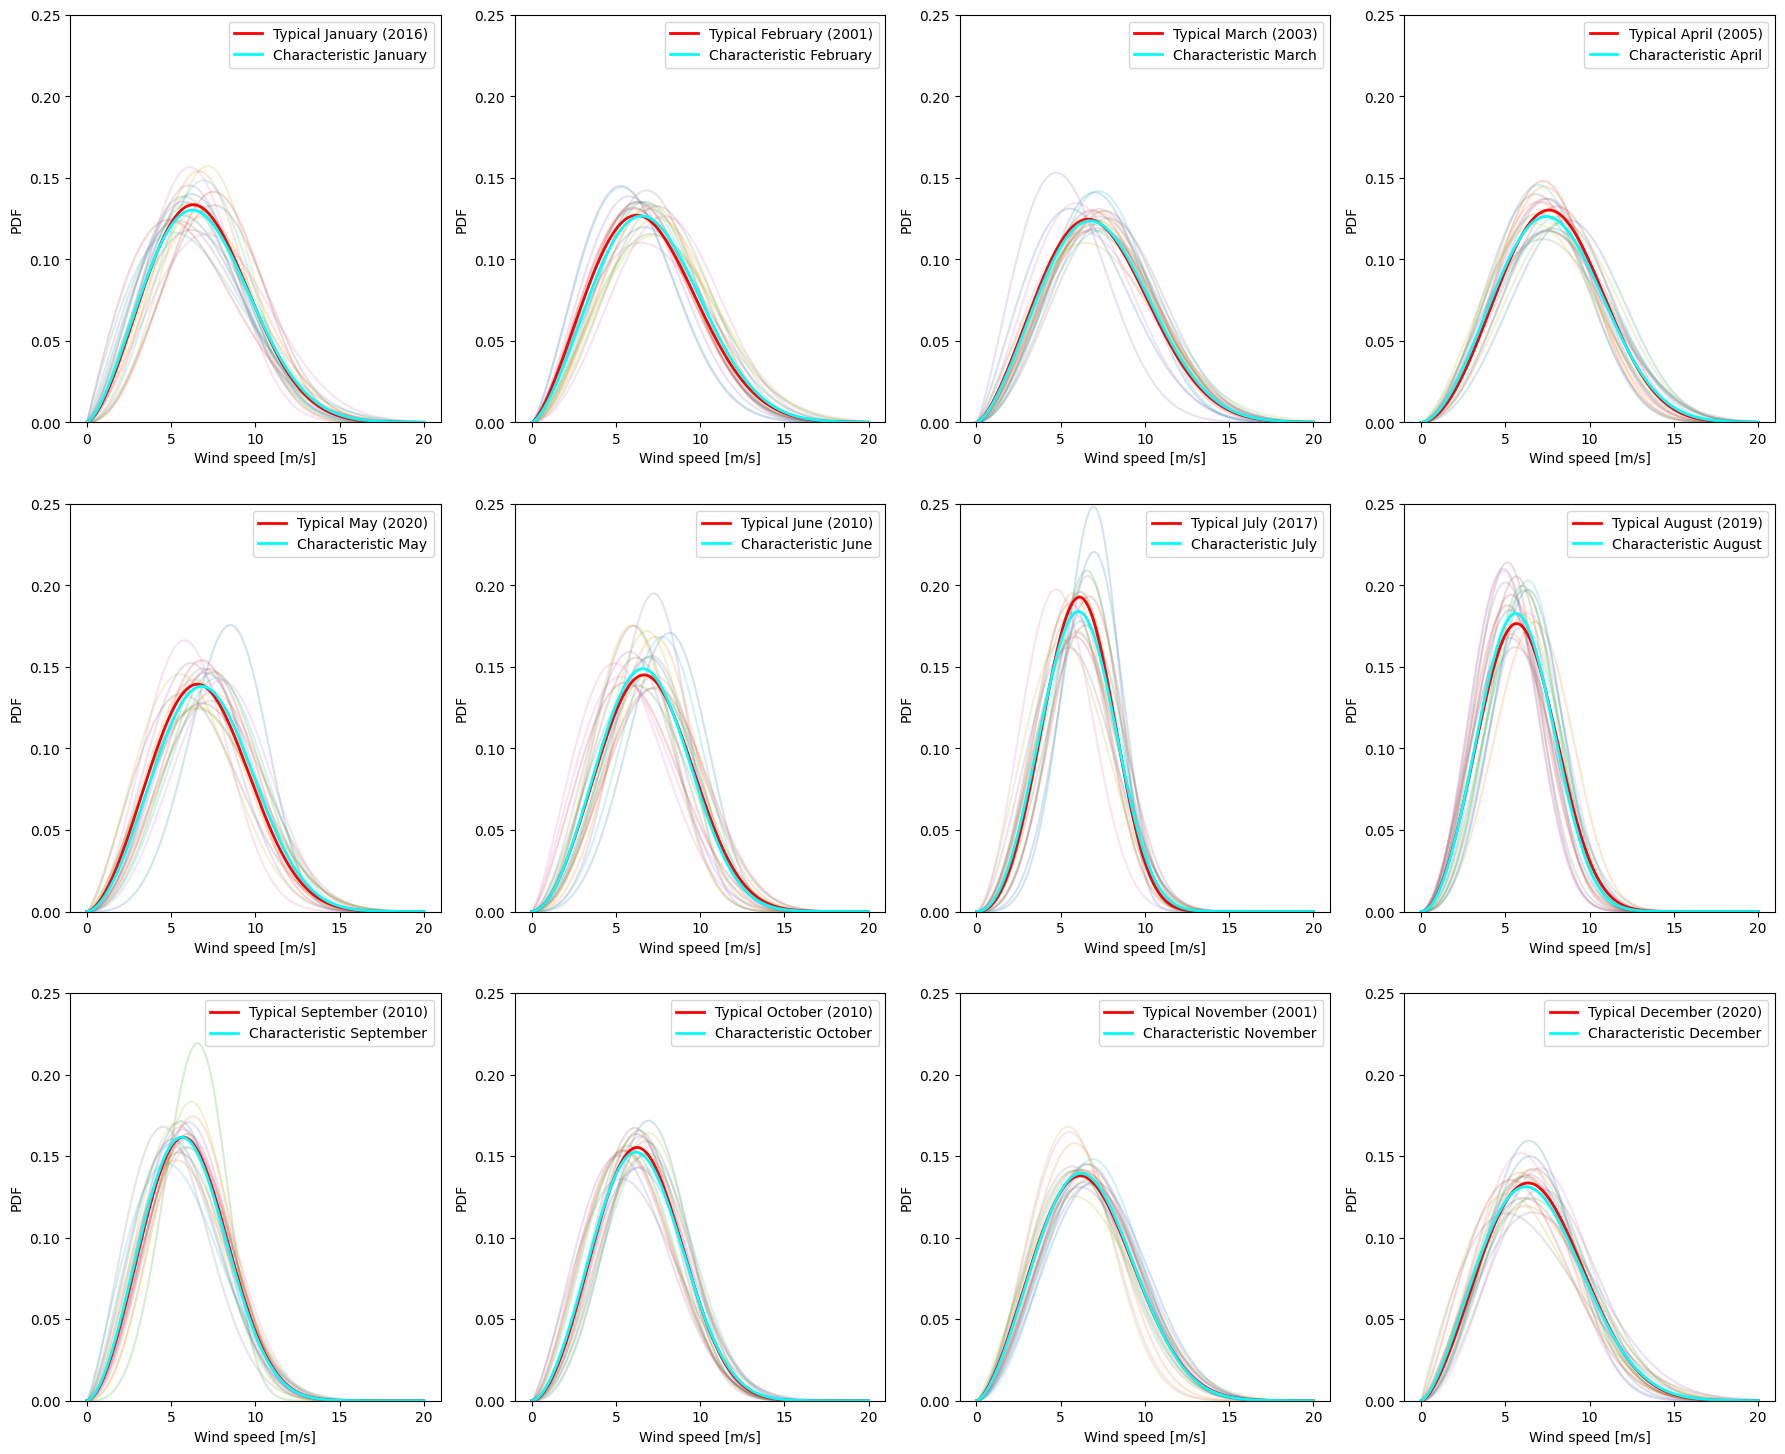

In [14]:
constuir_graficas_meses(2020)

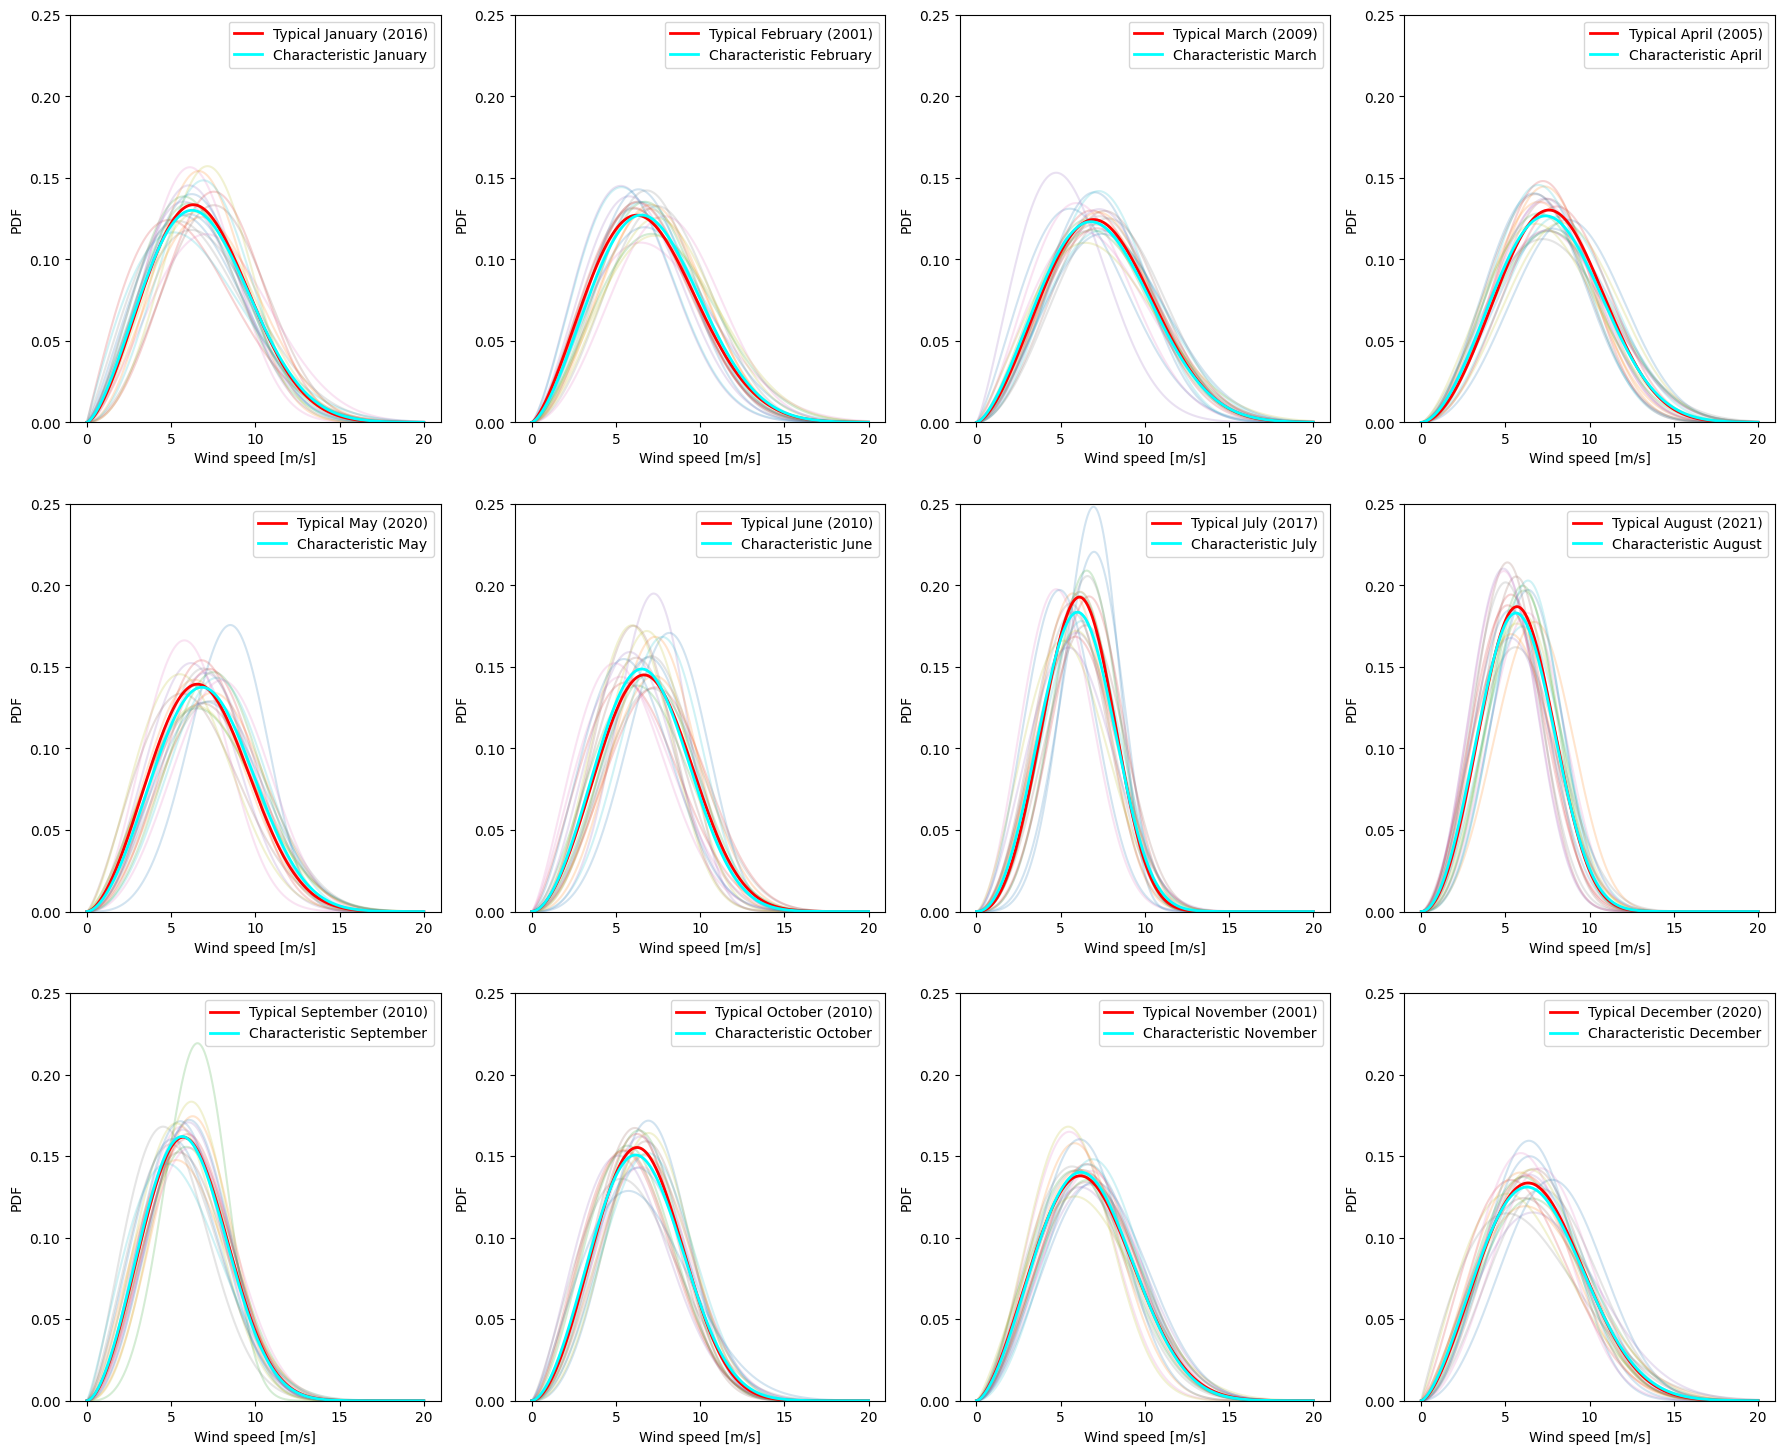

In [15]:
constuir_graficas_meses(2021)

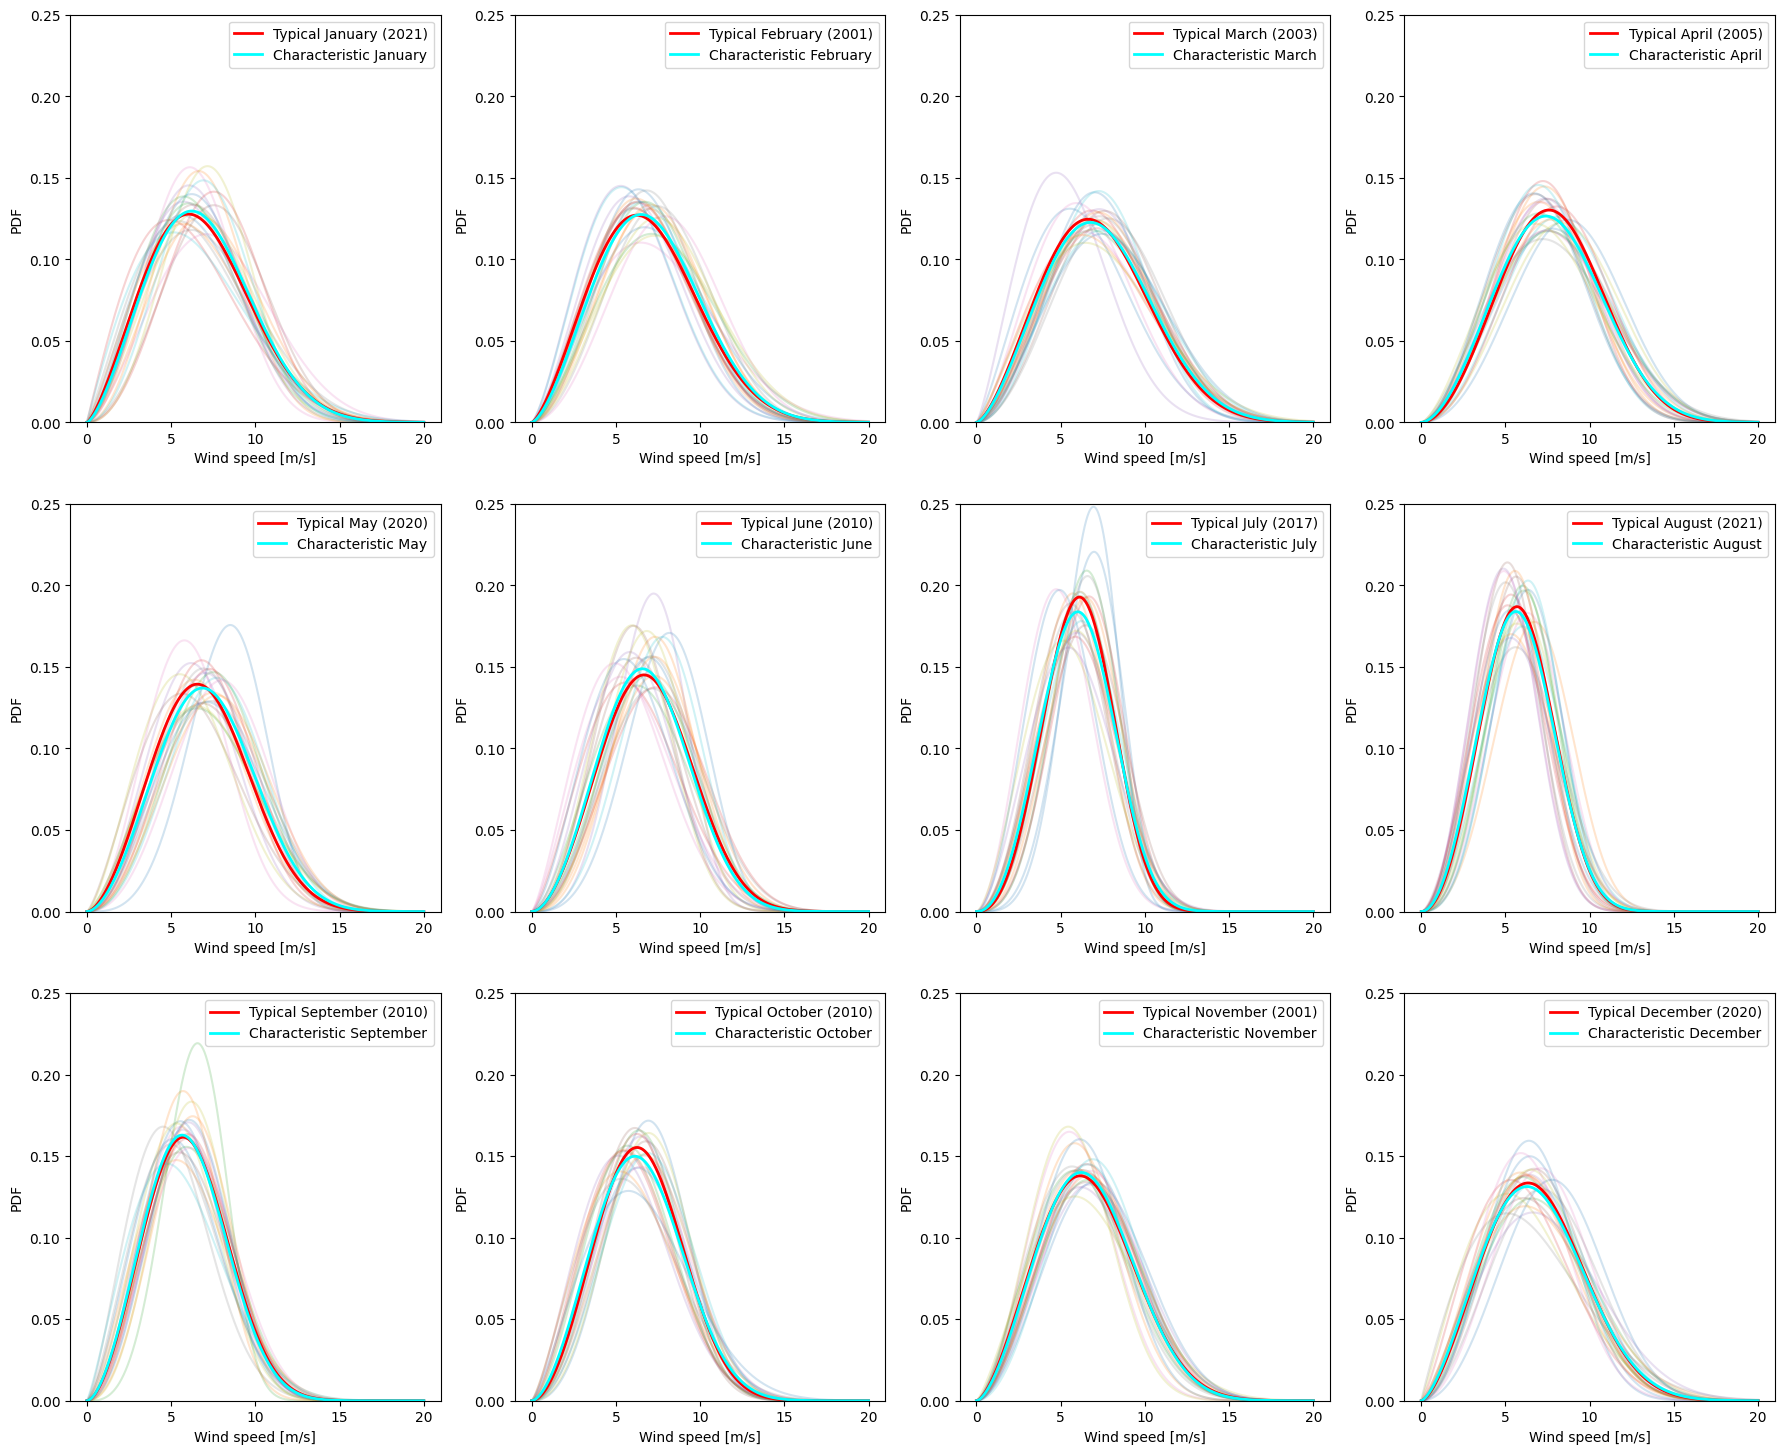

In [16]:
constuir_graficas_meses(2022)

### Constructor gráficas de histograma

Hasta año 2015:  Tipico k=2.6359 l=7.5550| Representativo k=2.6174 l=7.5423
Hasta año 2016:  Tipico k=2.6303 l=7.5388| Representativo k=2.6176 l=7.5369
Hasta año 2017:  Tipico k=2.6123 l=7.5410| Representativo k=2.6103 l=7.5463
Hasta año 2018:  Tipico k=2.6164 l=7.5516| Representativo k=2.6005 l=7.5412
Hasta año 2019:  Tipico k=2.6034 l=7.5605| Representativo k=2.5959 l=7.5490
Hasta año 2020:  Tipico k=2.6303 l=7.6007| Representativo k=2.6050 l=7.5543
Hasta año 2021:  Tipico k=2.6274 l=7.5656| Representativo k=2.6017 l=7.5505
Hasta año 2022:  Tipico k=2.6254 l=7.5849| Representativo k=2.6001 l=7.5533


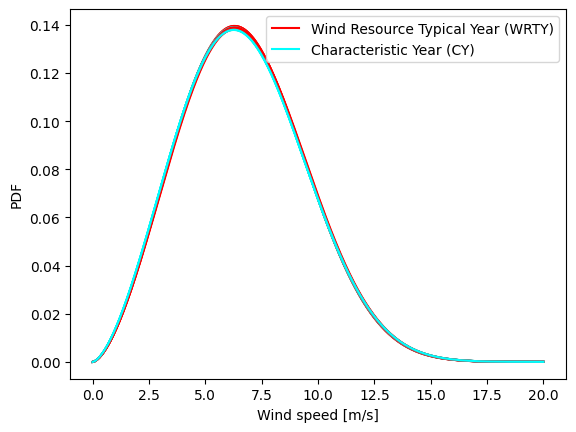

In [17]:
def constructor_graficas_histogramas():
    
    def formar_año_tipico(hasta_año):
        datos = []
        for mes in lib.MESES:
            obj:lib.ObjMes = obj_meses[mes]
            año_tipico = obj.encontrar_mes_tipico(hasta_año)
            datos.append( lib.cargar_datos(año=año_tipico) )
        return np.concatenate(datos)

    def formar_año_representativo(hasta_año):
        return lib.cargar_datos(list(range(2001,hasta_año+1)))
    
    plot_label = True
    x = np.linspace(0,20,1000)
    for hasta_año in range(2015,2023):

        tipico         = formar_año_tipico(hasta_año)
        representativo = formar_año_representativo(hasta_año)

        fit_tipico = lib.fit_weibull(tipico)
        fit_representativo = lib.fit_weibull(representativo)
        k_t, l_t = fit_tipico[1], fit_tipico[3]
        k_r, l_r = fit_representativo[1], fit_representativo[3]

        print("Hasta año {:4.0f}:  Tipico k={:6.4f} l={:6.4f}| Representativo k={:6.4f} l={:6.4f}".format(hasta_año, k_t,l_t, k_r, l_r))

        y_t = lib.generar_curva(x, fit_tipico)
        y_r = lib.generar_curva(x, fit_representativo)

        plt.plot(x,y_t, c="red" )
        plt.plot(x,y_r, c="cyan")

        if plot_label:
            plt.plot(x,y_t, c="red" , label="Wind Resource Typical Year (WRTY)")
            plt.plot(x,y_r, c="cyan", label="Characteristic Year (CY)")
            plt.ylabel("PDF")
            plt.xlabel("Wind speed [m/s]")
            plot_label = False
    plt.legend()
    plt.show() ; plt.close()


constructor_graficas_histogramas()

### K y Lambda por temporada

In [18]:
def plot_k_lambda(hasta_año):

    temporadas = {
        "Mild":["January","February", "March","April","May","June","October","November","December"],
        "Hot" : ["July", "August","September"],
    }

    def obtener_parametros(temporada):

        # Cargamos datos
        datos = []
        meses = temporadas[temporada]
        for mes in meses:
            obj:lib.ObjMes = obj_meses[mes]
            año = obj.encontrar_mes_tipico(hasta_año)
            datos.append( lib.cargar_datos(año=año, mes=mes) )
        datos = np.concatenate(datos)
        # Obtenemos parámetros
        _,_,k,lambda_o = lib.ajustar_weibull(datos)
        return k, lambda_o, datos
    
    k_hot , l_hot , hot  = obtener_parametros("Hot")
    k_mild, l_mild, mild = obtener_parametros("Mild")

    anual = np.concatenate([hot, mild])
    (_,_,k_anual,l_anual) = lib.ajustar_weibull(anual)
 

    print("Hasta año {:4.0f} -> Hot k={:5.3f} l={:5.3f} | Mild k={:5.3f} l={:5.3f} | Anual k={:5.3f} l={:5.3f}".format(
        hasta_año, k_hot, l_hot, k_mild, l_mild, k_anual, l_anual
    )
    )

    return k_hot, l_hot, k_mild, l_mild, k_anual, l_anual

for hasta_año in range(2015,2023):
    plot_k_lambda(hasta_año)


Hasta año 2015 -> Hot k=2.942 l=6.568 | Mild k=2.614 l=7.766 | Anual k=2.613 l=7.471
Hasta año 2016 -> Hot k=2.942 l=6.568 | Mild k=2.623 l=7.790 | Anual k=2.619 l=7.489
Hasta año 2017 -> Hot k=2.930 l=6.553 | Mild k=2.634 l=7.796 | Anual k=2.624 l=7.490
Hasta año 2018 -> Hot k=2.930 l=6.553 | Mild k=2.590 l=7.815 | Anual k=2.585 l=7.505
Hasta año 2019 -> Hot k=2.972 l=6.684 | Mild k=2.623 l=7.790 | Anual k=2.631 l=7.517
Hasta año 2020 -> Hot k=2.972 l=6.684 | Mild k=2.625 l=7.814 | Anual k=2.632 l=7.536
Hasta año 2021 -> Hot k=3.017 l=6.659 | Mild k=2.633 l=7.844 | Anual k=2.641 l=7.553
Hasta año 2022 -> Hot k=3.017 l=6.659 | Mild k=2.604 l=7.805 | Anual k=2.621 l=7.524


Hasta año 2017 -> Hot k=2.930 l=6.553 | Mild k=2.634 l=7.796 | Anual k=2.624 l=7.490


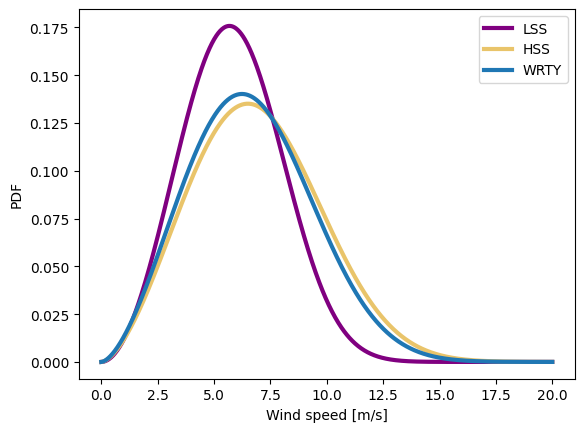

In [19]:
x = np.linspace(0,20,1000)
k_hot, l_hot, k_mild, l_mild, k_anual, l_anual = plot_k_lambda(hasta_año=2017)
y_hot   = lib.generar_curva(x, (1,k_hot  ,0 , l_hot  ))
y_mild  = lib.generar_curva(x, (1,k_mild ,0 , l_mild ))
y_anual = lib.generar_curva(x, (1,k_anual,0 , l_anual))


plt.plot(x,y_hot,lw=3,label="LSS", c="purple")
plt.plot(x,y_mild,lw=3,label="HSS", c="#e9c46a")
plt.plot(x,y_anual,lw=3,label="WRTY")
plt.ylabel("PDF")
plt.xlabel("Wind speed [m/s]")

plt.legend()